In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing data

In [132]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


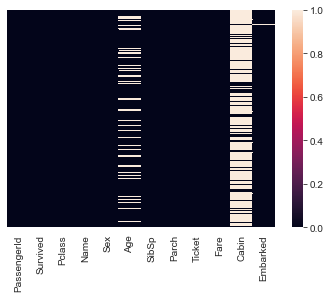

In [133]:
sns.heatmap(df.isnull(),yticklabels=False)   

#### White lines represents the missing values.  here we can see cabin has high missing value and age has some 20 percent missing cases.


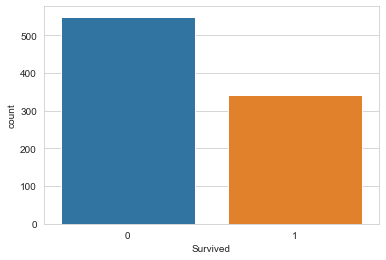

In [134]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=df)

#### almost 600 passenger didnot survived and roughly 330 passenger were survived 

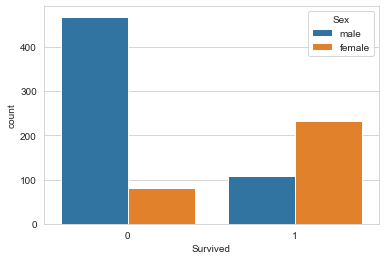

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

#### we can see that the death of male passengers is more as compare to females. 

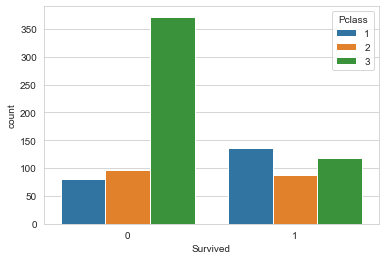

In [136]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

#### From this visualisation pclass 1 has survied more as compare to pclass 3 

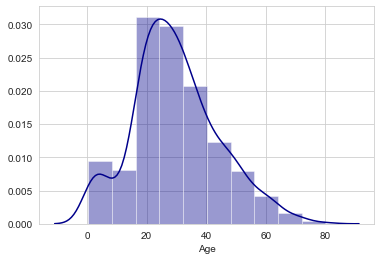

In [137]:
sns.distplot(df['Age'].dropna(),kde=True,color= 'darkblue',bins=10)

#### we can see the data follows normal curve

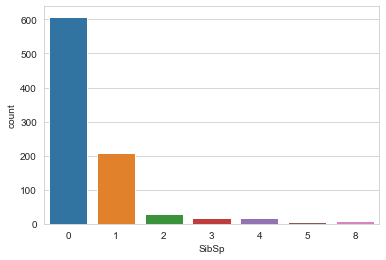

In [138]:
sns.countplot(x='SibSp',data=df)

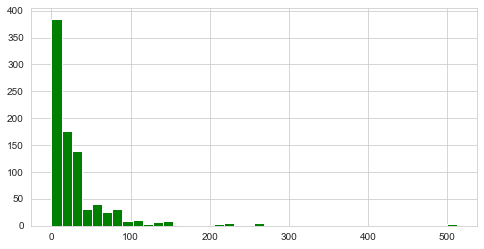

In [139]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Data Cleaning

We want to fill missing age data instead of droping the missing age data rows. this can be done by using various methods but we use one of most used and common method that is mean imputation.

<Figure size 864x504 with 0 Axes>

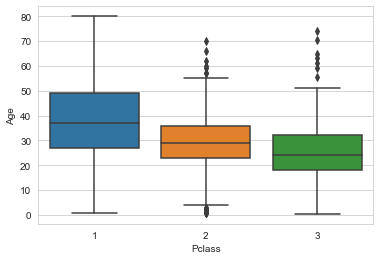

<Figure size 864x504 with 0 Axes>

In [140]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.figure(figsize=(12,7))

In [141]:
def imput_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [142]:
df['Age'] = df[['Age','Pclass']].apply(imput_age,axis=1)

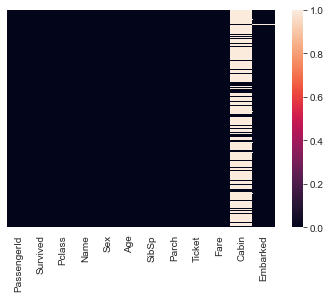

In [143]:
sns.heatmap(df.isnull(),yticklabels=False)

In [144]:
#Cabin has highest no of missing values so we can drop that column 
df.drop('Cabin',axis=1,inplace=True)

In [145]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [146]:
df.dropna(inplace=True)

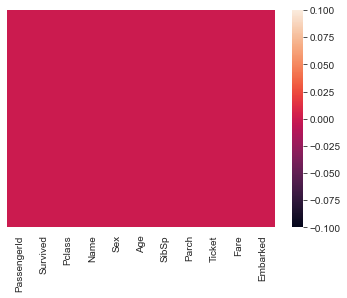

In [147]:
sns.heatmap(df.isnull(),yticklabels=False)

### Converting Categorical Features

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [149]:
pd.get_dummies(df['Embarked'],drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### In Embarked has three categorical values so that we take two and automatically we get to know third one.

In [150]:
sex =pd.get_dummies(df['Sex'],drop_first=True).head()
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [151]:
 df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [152]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [154]:
df = pd.concat([df,sex,embark],axis=1)

In [155]:
#The data is ready for model building
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0,1
1,2,1,1,38.0,1,0,71.2833,0.0,0,0
2,3,1,3,26.0,0,0,7.9250,0.0,0,1
3,4,1,1,35.0,1,0,53.1000,0.0,0,1
4,5,0,3,35.0,0,0,8.0500,1.0,0,1
